# Malawi Flood Challenge

In [10]:
# import librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import seaborn as sns
from sklearn import datasets
import pygeohash as pgh
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from math import sin, cos, sqrt, atan2, radians
from geojson import Point, MultiPoint
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from decimal import *

In [11]:
#import and explore data
data = pd.read_csv('Train.csv')
sample = pd.read_csv('SampleSubmission.csv')
data.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [12]:
#look for missing data 
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]

In [13]:
#Divide the data into train, validation and test data
train_features = ['X', 'Y', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15','LC_Type1_mode']
test_features = ['X', 'Y','elevation','precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'LC_Type1_mode']
X = data[train_features].copy()
X_test = data[test_features].copy()
y = data['target_2015'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,
                                                      random_state=0)


# Testing different models

In [14]:
#test random forest and change hyperparameters
Random_Forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
Random_Forest_model.fit(X_train, y_train)
ypred = abs(Random_Forest_model.predict(X_valid))
print(sum(abs(ypred - y_valid)))

50.6281205308808


In [15]:
#test xgboost and change hyperparmeters
XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=4)
XGB_model.fit(X_train, y_train)
ypred = abs(XGB_model.predict(X_valid))
print(sum(abs(ypred - y_valid)))


[13:52:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
103.79791513738863


In [16]:
models = [Random_Forest_model, XGB_model]

for model in models:
    
    score = -1 * cross_val_score(model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
    print("Average MAE score for",model, "is", score.mean())
    

Average MAE score for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False) is 0.09314607509830566
[13:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [17]:
#test lgb and change hyperparameters
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid)
param = {'num_leaves': 200, 'objective': 'binary'}
param['metric'] = 'l1'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)
ypred = abs(bst.predict(X_valid))
print(sum(abs(ypred - y_valid)))

137.7343432648075


In [18]:
#test catboost and change hyperparameters
cat_model = CatBoostRegressor(iterations=30, learning_rate=0.6, depth=10)
cat_model.fit(X_train, y_train)
preds = cat_model.predict(X_valid)
print(sum(abs(preds - y_valid)))

0:	learn: 0.1667690	total: 300ms	remaining: 8.71s
1:	learn: 0.1424502	total: 613ms	remaining: 8.59s
2:	learn: 0.1341229	total: 927ms	remaining: 8.34s
3:	learn: 0.1299886	total: 1.23s	remaining: 8s
4:	learn: 0.1237261	total: 1.54s	remaining: 7.71s
5:	learn: 0.1232402	total: 1.57s	remaining: 6.27s
6:	learn: 0.1227176	total: 1.88s	remaining: 6.17s
7:	learn: 0.1182501	total: 2.64s	remaining: 7.25s
8:	learn: 0.1164206	total: 3.72s	remaining: 8.68s
9:	learn: 0.1157875	total: 4.88s	remaining: 9.75s
10:	learn: 0.1148356	total: 6.04s	remaining: 10.4s
11:	learn: 0.1128288	total: 7.09s	remaining: 10.6s
12:	learn: 0.1125903	total: 8.21s	remaining: 10.7s
13:	learn: 0.1112057	total: 9.18s	remaining: 10.5s
14:	learn: 0.1111543	total: 9.27s	remaining: 9.27s
15:	learn: 0.1111533	total: 9.3s	remaining: 8.14s
16:	learn: 0.1111529	total: 9.35s	remaining: 7.15s
17:	learn: 0.1095274	total: 9.65s	remaining: 6.43s
18:	learn: 0.1093676	total: 9.95s	remaining: 5.76s
19:	learn: 0.1081962	total: 10.2s	remaining: 

# Feature engineering


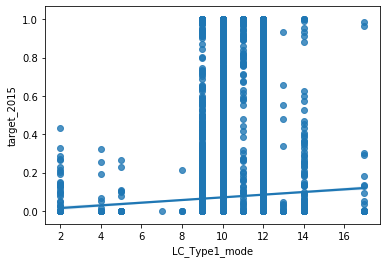

In [19]:
#check the different correlations between features
sns.regplot(x= X_train.LC_Type1_mode, y = y_train)

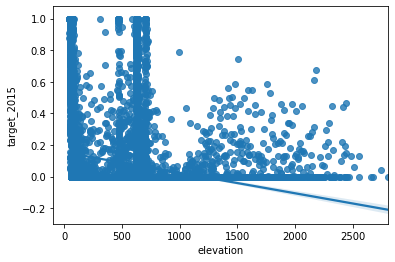

In [20]:
sns.regplot(x= X_train.elevation, y = y_train)

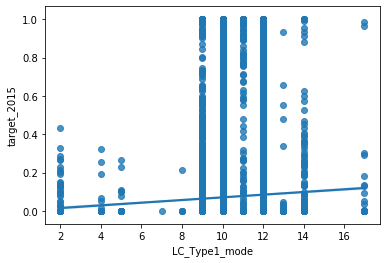

In [21]:
sns.regplot(x= X_train.LC_Type1_mode , y = y_train)

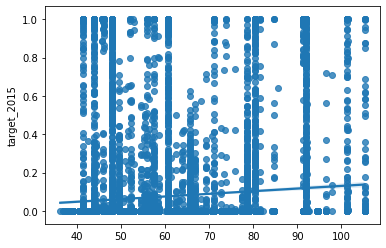

In [22]:
feat = ['precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15']
test_feat = ['precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19']
#calculating the maximum of precipitation for the train data
precip_max =X_train[feat].max(axis =1)
sns.regplot(x= precip_max , y = y_train)

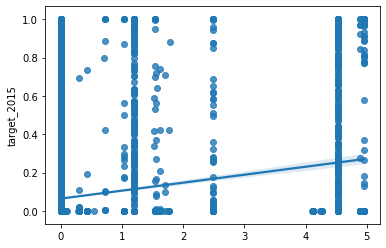

In [23]:
precip_min =X_train[feat].min(axis =1)
sns.regplot(x=precip_min  , y = y_train)

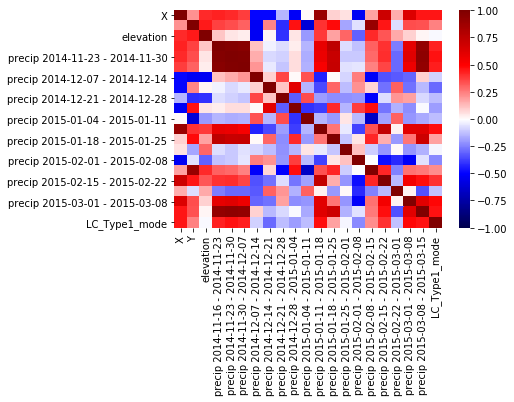

In [24]:
sns.heatmap(X_train.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

[26522.7689967365, 41198.88160486021, 19134.741766817104, 136183.85696054372, 146423.23278920318, 157626.06441133458, 377483.6478926689, 462912.1164237642, 969175.7180148631, 20601.818552636203, 570599.2198789973, 466232.9503488563, 205625.9095286183, 62613.3432921204, 281112.25228885177, 150020.87908741258, 5444.3347560449]


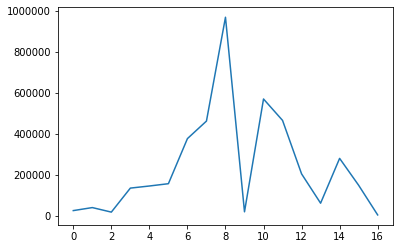

In [25]:
#check the precipitations total according to their week
tab = []
for i in range(len(feat)):
    tab.append(np.sum(X[feat[i]]))
print(tab)
plt.plot(tab)

[219475.69763500363, 73067.70599106721, 381179.6738812691, 160539.9620923185, 486998.2682775755, 30699.1938149612, 994957.4586064437, 202887.7875499328, 586804.6740108465, 35010.5638486014, 56863.6081942168, 58608.5284523836, 150296.3230601703, 27345.2353206171, 8663.4820412421, 15940.751205129502, 26110.849721709303]
precip 2019-02-03 - 2019-02-10


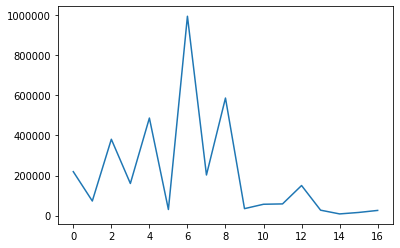

In [26]:
tab = []
for i in range(len(test_feat)):
    tab.append(np.sum(data[test_feat[i]]))
print(tab)
plt.plot(tab)
print(test_feat[len(test_feat)-15])

In [27]:
#adding some features: mean, min, max, std, 25%, 50%, 75% and std 
data['mean'] =data[feat].mean(axis =1)
data['max'] = data[feat].max(axis =1)
data['min'] = data[feat].min(axis =1)
data['std'] = data[feat].std(axis = 1)
data['25percentile'] = np.percentile(data[feat],25, axis =1)
data['50percentile'] = np.percentile(data[feat],50, axis =1)
data['75percentile'] = np.percentile(data[feat],75, axis =1)
data['test_mean'] = data[test_feat].mean(axis =1)
data['test_max'] = data[test_feat].mean(axis = 1)
data['test_min'] = data[test_feat].min(axis = 1)
data['test_std'] = data[test_feat].std(axis = 1)
data['test_25percentile'] = np.percentile(data[test_feat],25, axis =1)
data['test_50percentile'] = np.percentile(data[test_feat],50, axis =1)
data['test_75percentile'] = np.percentile(data[test_feat],75, axis =1)


#Add new precipitation columns that add up precipitations over each 2 weeks
for i in range(0,16,2):
    data["precip" + str(i)] = data[[feat[i],feat[i+1]]].sum(axis =1)
for i in range(0,16,2):
    data["test_precip" + str(i)] = data[[test_feat[i],test_feat[i+1]]].sum(axis =1)
data1 = data.copy()
#keep the precipitations calculated over 2 weeks and delete the precipitations for each week data
train_features = [ 'X', 'Y','elevation', 'precip0','precip2',
                  'precip4', 'precip6', 'precip8','precip10', 'precip12', 'precip14',
                 'LC_Type1_mode', 'mean', 'max']
test_features = [ 'X', 'Y','elevation','test_precip0','test_precip2', 'test_precip4', 'test_precip6',
                  'test_precip8','test_precip10', 'test_precip12', 'test_precip14',
                 'LC_Type1_mode','test_mean', 'test_max']
X_test = data1[test_features].copy()
X_test.columns = [ 'X', 'Y','elevation', 'precip0','precip2',
                  'precip4', 'precip6', 'precip8','precip10', 'precip12', 'precip14',
                 'LC_Type1_mode', 'mean', 'max']
X = data1[train_features].copy()
y = data1['target_2015'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,
                                                      random_state=0)


# Testing Models After Feature Engineering

0:	learn: 0.2171149	total: 78.7ms	remaining: 1.89s
1:	learn: 0.1986996	total: 135ms	remaining: 1.55s
2:	learn: 0.1834134	total: 199ms	remaining: 1.46s
3:	learn: 0.1725818	total: 266ms	remaining: 1.4s
4:	learn: 0.1649489	total: 345ms	remaining: 1.38s
5:	learn: 0.1596417	total: 403ms	remaining: 1.28s
6:	learn: 0.1556616	total: 460ms	remaining: 1.18s
7:	learn: 0.1524397	total: 525ms	remaining: 1.11s
8:	learn: 0.1491545	total: 589ms	remaining: 1.05s
9:	learn: 0.1469452	total: 641ms	remaining: 961ms
10:	learn: 0.1454178	total: 712ms	remaining: 906ms
11:	learn: 0.1444897	total: 777ms	remaining: 842ms
12:	learn: 0.1433728	total: 832ms	remaining: 768ms
13:	learn: 0.1416383	total: 885ms	remaining: 695ms
14:	learn: 0.1407990	total: 949ms	remaining: 633ms
15:	learn: 0.1403510	total: 1.04s	remaining: 584ms
16:	learn: 0.1392092	total: 1.09s	remaining: 515ms
17:	learn: 0.1384996	total: 1.16s	remaining: 449ms
18:	learn: 0.1380313	total: 1.23s	remaining: 387ms
19:	learn: 0.1372527	total: 1.3s	remainin

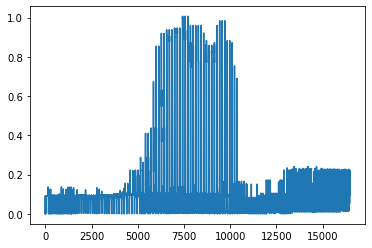

In [28]:
#try with catboost
cat_model = CatBoostRegressor(iterations=25, learning_rate=0.2, depth=4)
cat_model.fit(X_train, y_train)
preds = cat_model.predict(X_valid)
print(sum(abs(preds - y_valid)))
cat_pred = abs(cat_model.predict(X_test))
cat_result = pd.DataFrame({'Square_ID': data.Square_ID, 'target_2019':cat_pred })
cat_result.to_csv('output.csv', index=False) 
cat_result.head()
plt.plot(cat_pred)

49.27465292161295


,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.004668
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.004668
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.005481
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.008532
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.009926


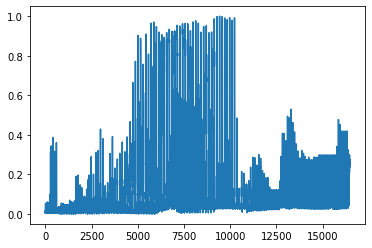

In [39]:
#Try with random forest
Random_Forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
Random_Forest_model.fit(X_train, y_train)
ypred = abs(Random_Forest_model.predict(X_valid))
print(sum(abs(ypred - y_valid)))
pred = abs(Random_Forest_model.predict(X_test))
rf_result = pd.DataFrame({'Square_ID': data.Square_ID, 'target_2019':pred })
rf_result.to_csv('output.csv', index=False) 

plt.plot(pred)
rf_result.head()

In [42]:
# try lightgbm
X_trainbis= X_train.copy()
X_validbis= X_valid.copy()
X_testbis = X_test.copy()
dtrain = lgb.Dataset(X_trainbis, label=y_train)
dvalid = lgb.Dataset(X_validbis, label=y_valid)
param = {'num_leaves': 200, 'objective': 'binary'}
param['metric'] = 'l1'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)

In [43]:
ypred = abs(bst.predict(X_validbis))
print(sum(abs(ypred - y_valid)))


137.98673469056143


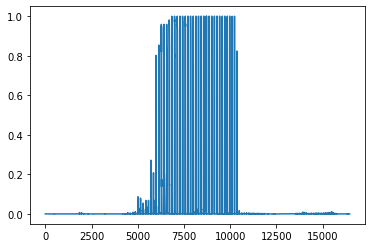

In [44]:
ypred = abs(bst.predict(X_test))
lgb_result = pd.DataFrame({'Square_ID': data.Square_ID, 'target_2019':ypred3 })
lgb_result.to_csv('output.csv', index=False) 
lgb_result.head()
plt.plot(ypred)

In [33]:
#XGB gives better results 
#XGB hyperparameter tuning
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=102, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[13:55:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 6, 'min_child_weight': 6}, -0.010801351541429282)

In [34]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=6,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

[13:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'gamma': 0.0}, -0.010801351541429282)

In [35]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=6,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='neg_mean_squared_error', n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.best_params_, gsearch4.best_score_

[13:55:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.9, 'subsample': 0.9}, -0.010669742266870652)

In [36]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=6,
 min_child_weight=6, gamma=0, subsample=0.9, colsample_bytree=0.9, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_squared_error', n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.best_params_, gsearch5.best_score_

[13:56:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.8, 'subsample': 0.8}, -0.010824635141082454)

In [37]:
param_test6 = {
 'reg_alpha':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=6,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train, y_train)
gsearch6.best_params_, gsearch6.best_score_

[13:56:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'reg_alpha': 0.01}, -0.01117940865795793)

In [38]:
# Predict using XGB model 
XGB_model = XGBRegressor(learning_rate =0.04,
 n_estimators=102,
 max_depth=6,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
reg_alpha = 0.01,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 objective = 'reg:squarederror',
eval_metric = 'rmse',
 seed=27)
XGB_model.fit(X_train, y_train)
ypred = abs(XGB_model.predict(X_valid))
print(sum(abs(ypred - y_valid)))
preds = abs(XGB_model.predict(X_test))
#add some conditions for the results
for i in range(1,len(preds)-1):
    if (preds[i]< 0.17) :
        preds[i] =0.0
    if (preds[i]>0.95):
        preds[i]=1.0
XGB_result = pd.DataFrame({'Square_ID': data.Square_ID, 'target_2019':preds })
XGB_result.to_csv('output.csv', index=False) 
XGB_result.head()

82.17592212789299


,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.011205
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.000000
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.000000
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.000000
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.000000
